In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


Analysis for PostMN_TBI_MPH:
       count       mean        std   min    25%   50%    75%    max
label                                                              
1.0     39.0  16.589744   9.452702   5.0  10.00  14.0  22.50   48.0
2.0    265.0  28.166038  14.697543   3.0  18.00  25.0  37.00   85.0
3.0    155.0  35.374194  18.335668   7.0  22.00  30.0  48.00  141.0
4.0     44.0  49.454545  24.907694  17.0  29.75  47.0  57.25  140.0
Analysis for PreMN_TBI_MPH:
       count       mean        std   min    25%   50%    75%    max
label                                                              
1.0     39.0  18.333333   8.405303   7.0  11.00  17.0  26.00   37.0
2.0    265.0  29.090566  14.299532   5.0  19.00  26.0  36.00   86.0
3.0    155.0  34.470968  14.962425   6.0  22.50  31.0  45.00   79.0
4.0     44.0  45.068182  24.178020  13.0  29.75  40.5  53.25  121.0
Analysis for MN_TBI_MPH:
       count       mean        std   min    25%   50%    75%    max
label                             

<Figure size 1000x600 with 0 Axes>

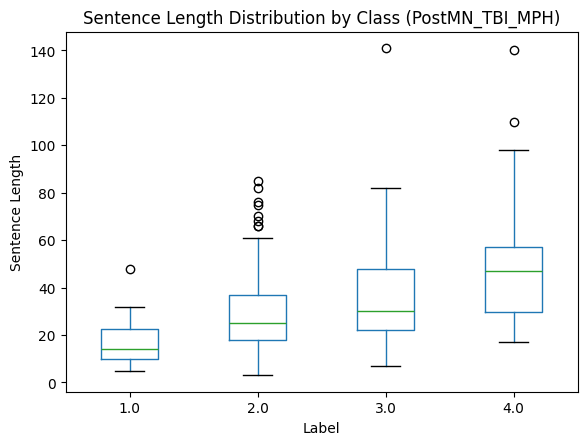

<Figure size 1000x600 with 0 Axes>

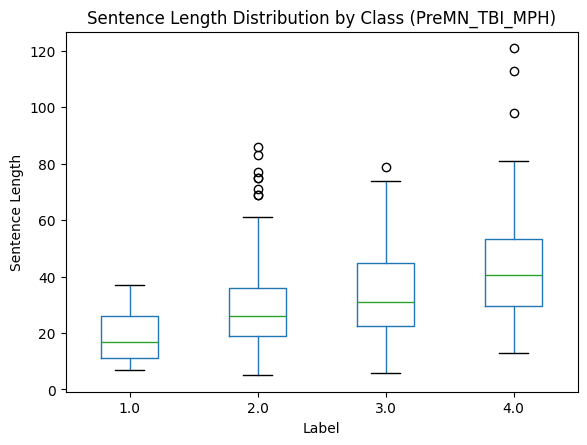

<Figure size 1000x600 with 0 Axes>

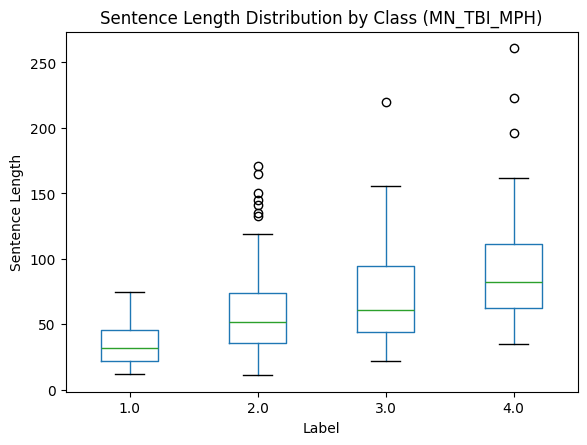

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
dataset_after = "/media/data3/home/khiemdd/ViTBERT/dataset/dataset_processing_strategy3/after.csv"
dataset_before = "/media/data3/home/khiemdd/ViTBERT/dataset/dataset_processing_strategy3/before.csv"
dataset_concat = "/media/data3/home/khiemdd/ViTBERT/dataset/dataset_processing_strategy3/concat.csv"

# Load CSV files into DataFrames, skipping the first row
df_after = pd.read_csv(dataset_after, header=0, names=["text", "label"])
df_before = pd.read_csv(dataset_before, header=0, names=["text", "label"])
df_concat = pd.read_csv(dataset_concat, header=0, names=["text", "label"])

# Function to calculate sentence length (number of words) and group by label
def analyze_sentence_length(dataset, dataset_name):
    dataset["sentence_length"] = dataset["text"].apply(lambda x: len(str(x).split()))
    grouped = dataset.groupby("label")["sentence_length"].describe()
    print(f"Analysis for {dataset_name}:")
    print(grouped)
    return grouped

# Analyze each dataset
analysis_after = analyze_sentence_length(df_after, "PostMN_TBI_MPH")
analysis_before = analyze_sentence_length(df_before, "PreMN_TBI_MPH")
analysis_concat = analyze_sentence_length(df_concat, "MN_TBI_MPH")

# Function to visualize sentence length distribution per class
def plot_sentence_length_distribution(dataset, dataset_name):
    dataset["sentence_length"] = dataset["text"].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10, 6))
    dataset.boxplot(column="sentence_length", by="label", grid=False)
    plt.title(f"Sentence Length Distribution by Class ({dataset_name})")
    plt.suptitle("")  # Remove default title
    plt.xlabel("Label")
    plt.ylabel("Sentence Length")
    plt.show()

# Plot distributions for each dataset
plot_sentence_length_distribution(df_after, "PostMN_TBI_MPH")
plot_sentence_length_distribution(df_before, "PreMN_TBI_MPH")
plot_sentence_length_distribution(df_concat, "MN_TBI_MPH")


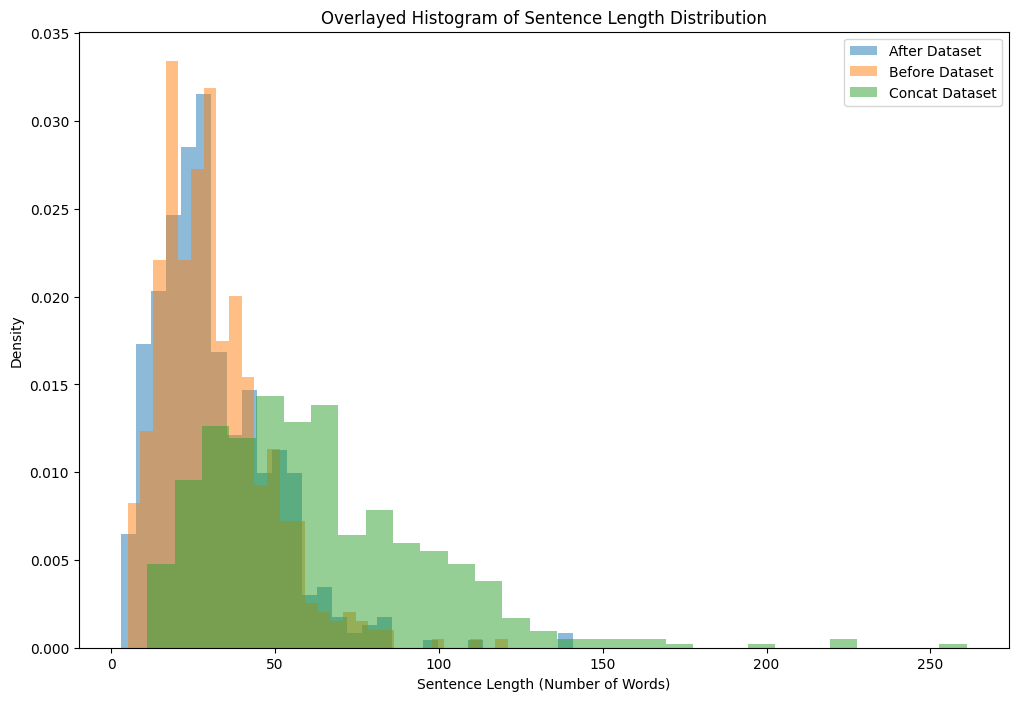

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
dataset_after = "/media/data3/home/khiemdd/ViTBERT/dataset/dataset_processing_strategy3/after.csv"
dataset_before = "/media/data3/home/khiemdd/ViTBERT/dataset/dataset_processing_strategy3/before.csv"
dataset_concat = "/media/data3/home/khiemdd/ViTBERT/dataset/dataset_processing_strategy3/concat.csv"

# Load CSV files into DataFrames, skipping the first row
df_after = pd.read_csv(dataset_after, header=0, names=["text", "label"])
df_before = pd.read_csv(dataset_before, header=0, names=["text", "label"])
df_concat = pd.read_csv(dataset_concat, header=0, names=["text", "label"])

# Calculate sentence length for all datasets
df_after["sentence_length"] = df_after["text"].apply(lambda x: len(str(x).split()))
df_before["sentence_length"] = df_before["text"].apply(lambda x: len(str(x).split()))
df_concat["sentence_length"] = df_concat["text"].apply(lambda x: len(str(x).split()))

# Overlayed histogram for all datasets
plt.figure(figsize=(12, 8))
plt.hist(df_after["sentence_length"], bins=30, alpha=0.5, label="After Dataset", density=True)
plt.hist(df_before["sentence_length"], bins=30, alpha=0.5, label="Before Dataset", density=True)
plt.hist(df_concat["sentence_length"], bins=30, alpha=0.5, label="Concat Dataset", density=True)

plt.title("Overlayed Histogram of Sentence Length Distribution")
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Density")
plt.legend()
plt.show()
